# 데이터, 라이브러리 로드
* 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [7]:
# 인슐린이 0인 데이터들을 볼 수 있음
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 데이터 전처리 : 당뇨병 여부에 따라 인슐린 값을 중앙값으로 대체

In [9]:
# 중앙값이 0이면 전처리 무의미
df.groupby("Outcome")["Insulin"].median()

Outcome
0    39.0
1     0.0
Name: Insulin, dtype: float64

In [11]:
# 인슐린이 0보다 큰 값에 대해서만 중앙값 계산
df[df["Insulin"] > 0].groupby("Outcome")["Insulin"].median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [18]:
df["Insulin_fill"] = df["Insulin"]

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,94
4,0,137,40,35,168,43.1,2.288,33,1,168
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,180
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,112
766,1,126,60,0,0,30.1,0.349,47,1,0


In [24]:
Insulin_median = df[df["Insulin"] > 0].groupby("Outcome")["Insulin"].median()
Insulin_median[0]

102.5

In [25]:
df.loc[(df["Outcome"] == 0) & (df['Insulin'] == 0), "Insulin_fill"] = Insulin_median[0]
df.loc[(df["Outcome"] == 1) & (df['Insulin'] == 0), "Insulin_fill"] = Insulin_median[1]

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,169.5
1,1,85,66,29,0,26.6,0.351,31,0,102.5
2,8,183,64,0,0,23.3,0.672,32,1,169.5
3,1,89,66,23,94,28.1,0.167,21,0,94.0
4,0,137,40,35,168,43.1,2.288,33,1,168.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,180.0
764,2,122,70,27,0,36.8,0.340,27,0,102.5
765,5,121,72,23,112,26.2,0.245,30,0,112.0
766,1,126,60,0,0,30.1,0.349,47,1,169.5


In [27]:
df[["Insulin", "Insulin_fill"]].describe()

,Insulin,Insulin_fill
count,768.000000,768.000000
mean,79.799479,141.753906
std,115.244002,89.100847
min,0.000000,14.000000
25%,0.000000,102.500000
50%,30.500000,102.500000
75%,127.250000,169.500000
max,846.000000,846.000000


# feature names와 label 분리

In [28]:
label = "Outcome"
label

'Outcome'

In [29]:
feature_names = df.columns.tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Insulin_fill']

In [30]:
feature_names.remove(label)
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_fill']

# train test split 

In [31]:
X = df[feature_names]
y = df[label]

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_fill
0,6,148,72,35,33.6,0.627,50,169.5
1,1,85,66,29,26.6,0.351,31,102.5
2,8,183,64,0,23.3,0.672,32,169.5
3,1,89,66,23,28.1,0.167,21,94.0
4,0,137,40,35,43.1,2.288,33,168.0


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 균등하게 배분되었는지 시각화

In [69]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [70]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

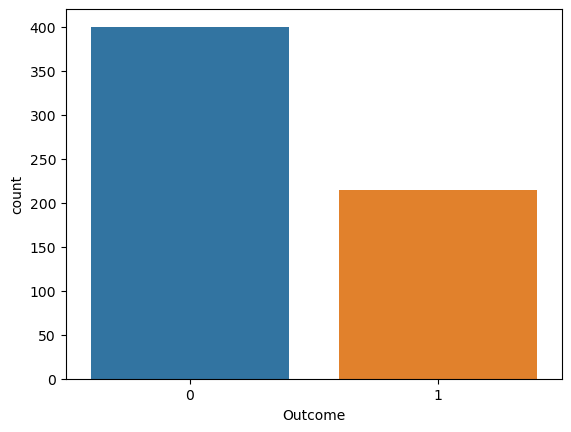

In [47]:
sns.countplot(data=df, x=y_train)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

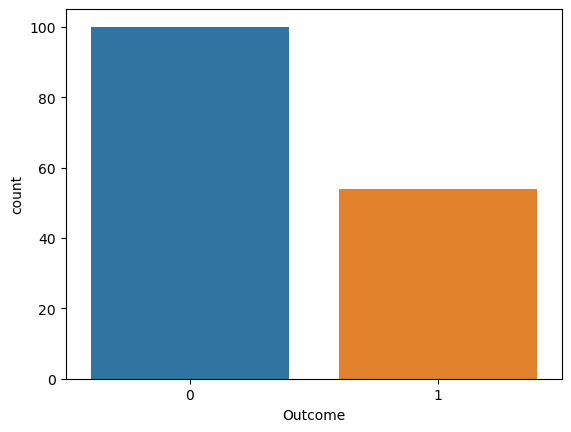

In [48]:
sns.countplot(data=df, x=y_test)

## subplots

(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

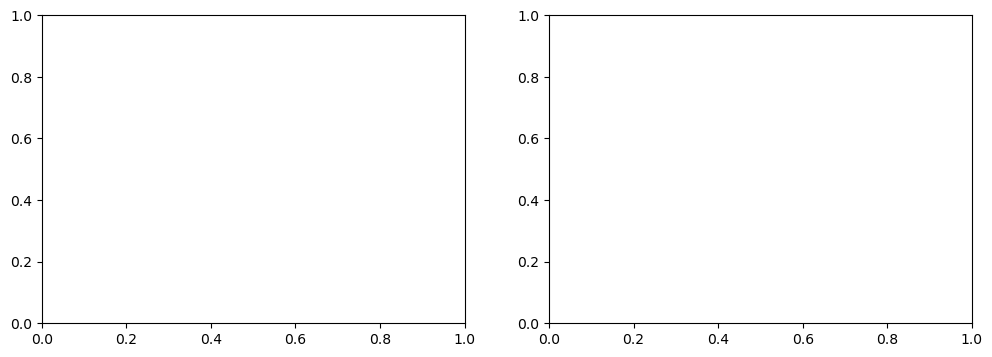

In [53]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

<AxesSubplot:xlabel='Outcome', ylabel='count'>

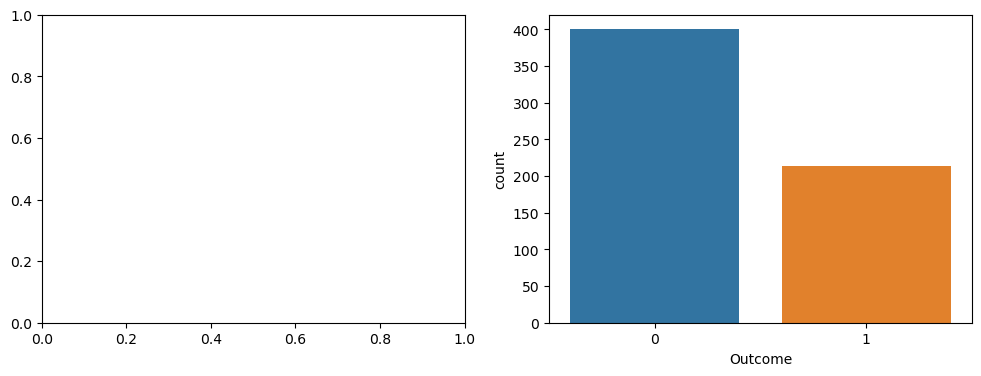

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# fig = (<Figure size 1200x400 with 2 Axes>,
# axes = array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

# 위치를 지정하지 않으면 항상 마지막에 그려짐
sns.countplot(data=df, x=y_train)

In [57]:
axes.shape

(2,)

Text(0.5, 1.0, 'test')

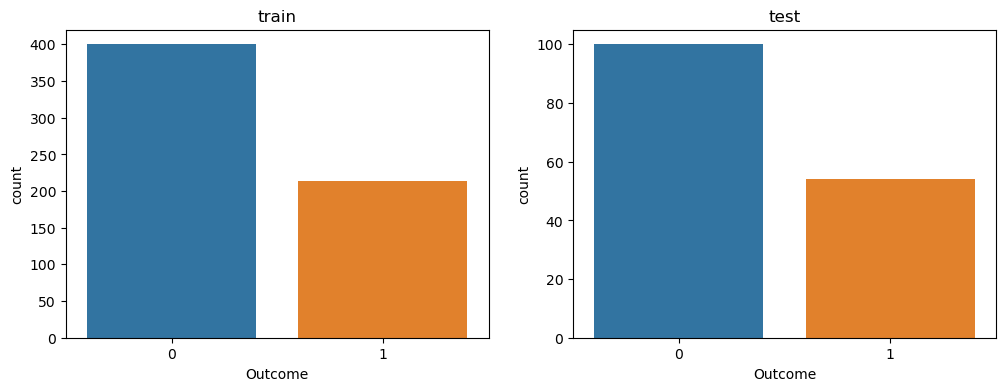

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(data=df, x=y_train, ax=axes[0]).set_title("train")
sns.countplot(data=df, x=y_test, ax=axes[1]).set_title("test")

Text(0.5, 1.0, 'test')

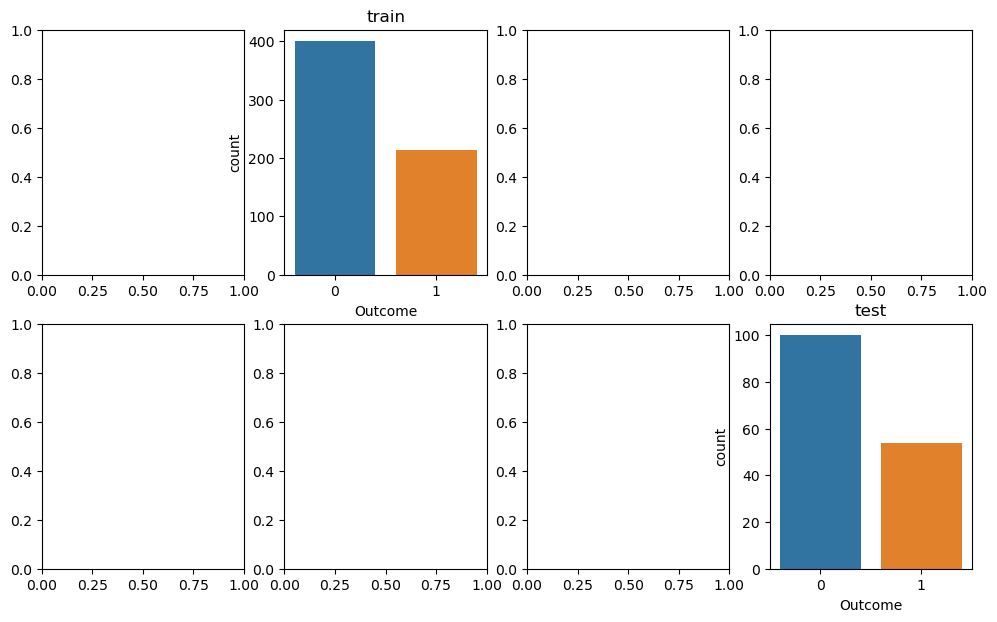

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 7))

sns.countplot(data=df, x=y_train, ax=axes[0, 1]).set_title("train")
sns.countplot(data=df, x=y_test, ax=axes[1, 3]).set_title("test")

# 머신러닝

In [75]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## GridSearch

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
max_depth = list(range(3, 20, 2))
max_depth

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [83]:
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
max_features

[0.3, 0.5, 0.7, 0.8, 0.9]

In [84]:
parameters = {"max_depth": max_depth, "max_features": max_features}
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]}

In [85]:
model

DecisionTreeClassifier(random_state=42)

In [90]:
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]})

In [91]:
# 최상의 조합
clf.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=0.5, random_state=42)

In [98]:
# 조합별 실행 결과를 df으로 출력 
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.001440,0.000190,0.000549,0.000070,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.869919,0.837398,0.861789,0.860656,0.856684,0.010937,1
11,0.001294,0.000105,0.000509,0.000017,7,0.5,"{'max_depth': 7, 'max_features': 0.5}",0.869919,0.861789,0.869919,0.878049,0.803279,0.856591,0.027147,2
22,0.001808,0.000422,0.000744,0.000360,11,0.7,"{'max_depth': 11, 'max_features': 0.7}",0.796748,0.869919,0.861789,0.886179,0.860656,0.855058,0.030548,3


## RandomizedSearchCV

In [103]:
np.random.randint(3, 20, 10)

array([ 8, 15,  8,  4,  9,  9, 18,  7,  7, 18])

In [106]:
# uniform 은 균등분포 함수
# (0, 1, 1000) 같이 파라미터를 전달하면 최소 0부터 최대 1사이의 값을 1000개 뽑음
np.random.uniform(0.5, 1, 10)

array([0.51924573, 0.51772856, 0.97510693, 0.67235173, 0.80575705,
       0.96064165, 0.61312217, 0.73953351, 0.99665804, 0.57740669])

In [109]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(3, 20, 10),
                       "max_features": np.random.uniform(0.5, 1, 10)}

clfr = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=10, random_state=42, n_jobs=-1, cv=5)
clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10,  8, 14,  4, 18,  9, 17,  7, 10, 17]),
                                        'max_features': array([0.82807655, 0.64839226, 0.59780756, 0.97750537, 0.50057034,
       0.87947964, 0.86093377, 0.85980375, 0.60987457, 0.57513044])},
                   random_state=42)

In [110]:
clfr.best_params_

{'max_features': 0.8280765528899352, 'max_depth': 7}

In [116]:
clfr.best_score_

0.8420631747301079

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio

In [115]:
pd.DataFrame(clfr.cv_results_).nsmallest(5, "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.001724,0.000072,0.000593,0.000061,0.828077,7,"{'max_features': 0.8280765528899352, 'max_dept...",0.796748,0.837398,0.821138,0.886179,0.868852,0.842063,0.032177,1
1,0.002423,0.000694,0.000721,0.000149,0.977505,9,"{'max_features': 0.9775053672456948, 'max_dept...",0.837398,0.829268,0.845528,0.886179,0.811475,0.841970,0.024816,2
4,0.001636,0.000318,0.000631,0.000145,0.50057,18,"{'max_features': 0.5005703446054717, 'max_dept...",0.837398,0.829268,0.837398,0.878049,0.811475,0.838718,0.021826,3
6,0.001493,0.000121,0.000560,0.000056,0.597808,14,"{'max_features': 0.5978075637225465, 'max_dept...",0.837398,0.829268,0.837398,0.878049,0.811475,0.838718,0.021826,3
5,0.001431,0.000157,0.000667,0.000122,0.57513,4,"{'max_features': 0.5751304377269966, 'max_dept...",0.853659,0.845528,0.829268,0.837398,0.819672,0.837105,0.011920,5


## Best Estimator

In [117]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=0.5, random_state=42)

In [118]:
y_predict = best_model.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [119]:
(y_test == y_predict).mean()

0.8831168831168831

## feature importance 

In [120]:
best_model.feature_importances_

array([0.04520373, 0.09121976, 0.02345239, 0.1116541 , 0.03580812,
       0.06630877, 0.0409649 , 0.58538823])

<AxesSubplot:>

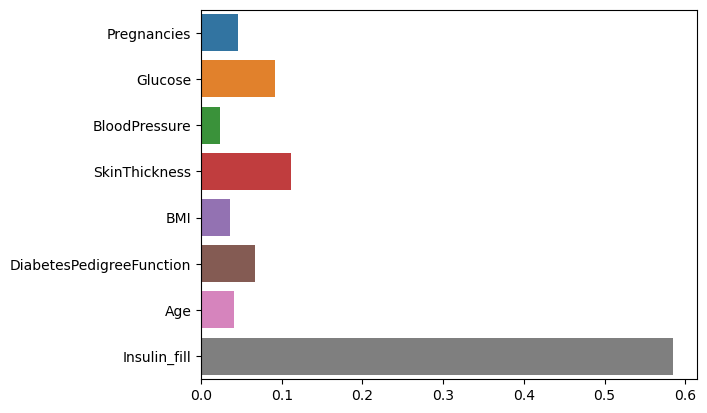

In [121]:
sns.barplot(x=best_model.feature_importances_, y=best_model.feature_names_in_)

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8831168831168831

In [123]:
# 데이터 개수에 따라 다른 정확도를 보임
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.85      0.81      0.83        54

    accuracy                           0.88       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

